In [1]:
import skimage.measure as msr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd

In [2]:
from wmark import WaterMark

In [3]:
import glob
import os
from pathlib import Path

In [4]:
# Source Directory
src_folder = 'TestSet/'
# Source Path
src_pth = Path(src_folder).resolve()

In [5]:
imgs = src_pth.glob('*.tif')

In [6]:
# Creating empty DataFrames that will fill up during the loop
pandas_dataframe_final_PSNR = pd.DataFrame()
pandas_dataframe_final_SSIM = pd.DataFrame()

for img in imgs:
    
    img_original = WaterMark.imread(img)

    # Attributes: image, maximum impact factor value, steps, seed
    pandas_dataframe_temp = WaterMark.impactFactor_PSNR_SSIM(img_original, 10001, 25, 5)
    
    # Creating temporary DataFrames
    pandas_dataframe_IF = pandas_dataframe_temp['Impact Factor']
    pandas_dataframe_PSNR = pandas_dataframe_temp['PSNR']
    pandas_dataframe_SSIM = pandas_dataframe_temp['SSIM']
    
    # Creating final DataFrames (separated for PSNR and SSIM)
    pandas_dataframe_final_PSNR = pd.concat([pandas_dataframe_final_PSNR, pandas_dataframe_PSNR], axis= 1)
    pandas_dataframe_final_SSIM = pd.concat([pandas_dataframe_final_SSIM, pandas_dataframe_SSIM], axis= 1)
    
    #Print a dot after looping through each image (to keep track of progress)
    print('.')

/Users/zgebac/anaconda3/envs/conda-env_python/lib/python3.7/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/zgebac/anaconda3/envs/conda-env_python/lib/python3.7/site-packages/skimage/measure/simple_metrics.py:145: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


.
.
.
.
.
.
.
.
.
.


In [7]:
# Adding Impact Factor values to PSNR/SSIM DataFrames
pandas_dataframe_final_IF_PSNR = pd.concat([pandas_dataframe_IF, pandas_dataframe_final_PSNR], axis= 1)
pandas_dataframe_final_IF_SSIM = pd.concat([pandas_dataframe_IF, pandas_dataframe_final_SSIM], axis= 1)

In [8]:
# Making Impact Factor index
pandas_dataframe_final_IF_PSNR_index = pandas_dataframe_final_IF_PSNR.set_index('Impact Factor')
pandas_dataframe_final_IF_SSIM_index = pandas_dataframe_final_IF_SSIM.set_index('Impact Factor')

In [ ]:
pandas_dataframe_final_IF_PSNR_index

In [ ]:
pandas_dataframe_final_IF_SSIM_index

In [9]:
# Creating DataFrames with mean PSNR/SSIM values
pandas_dataframe_final_PSNR_mean = pandas_dataframe_final_IF_PSNR_index.mean(axis = 1)
pandas_dataframe_final_SSIM_mean = pandas_dataframe_final_IF_SSIM_index.mean(axis = 1)

In [ ]:
pandas_dataframe_final_PSNR_mean

In [ ]:
pandas_dataframe_final_SSIM_mean

Text(0, 63, 'There is a clear correlation between the Impact Factor and\nPSNR Values, and it is quite consistent throughout the graph')

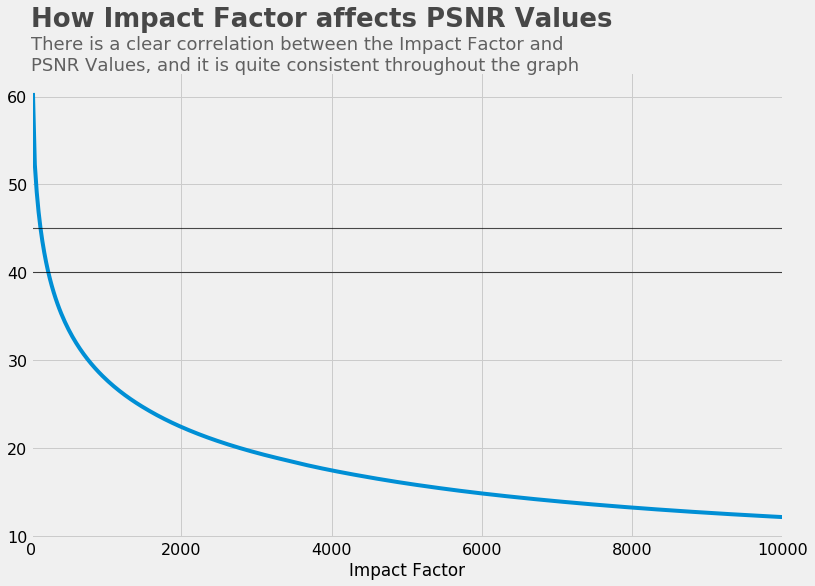

In [11]:
# https://www.dataquest.io/blog/making-538-plots/

style.use('fivethirtyeight')

fte_graph_1 = pandas_dataframe_final_PSNR_mean.plot(x = 'Impact Factor', y = 'PSNR', figsize = (12, 8))
fte_graph_1.tick_params(axis = 'both', which = 'major', labelsize = 16)

# Creating different lines accross the graph (can be used for important slices)
fte_graph_1.axhline(y = 40, color = 'black', linewidth = 1.1, alpha = .7)
fte_graph_1.axhline(y = 45, color = 'black', linewidth = 1.1, alpha = .7)

# Setting visibility of X-label
fte_graph_1.xaxis.label.set_visible(True)

# Title
fte_graph_1.text(x = 0, y = 68, s = "How Impact Factor affects PSNR Values",
               fontsize = 26, weight = 'bold', alpha = .7)

# Subtitle
fte_graph_1.text(x = 0, y = 63,
               s = "There is a clear correlation between the Impact Factor and\nPSNR Values, and it is quite consistent throughout the graph",
              fontsize = 18, alpha = .6)

Text(0, 1.06, 'There is a clear correlation between the Impact Factor and\nSSIM Values, and it is quite consistent throughout the graph')

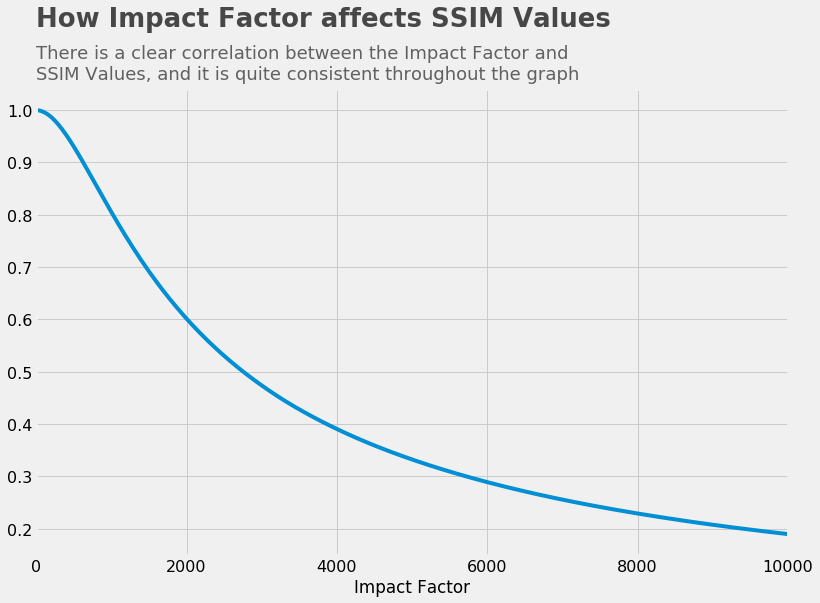

In [12]:
fte_graph_2 = pandas_dataframe_final_SSIM_mean.plot(x = 'Impact Factor', y = 'SSIM', figsize = (12, 8))
fte_graph_2.tick_params(axis = 'both', which = 'major', labelsize = 16)

# Creating different lines accross the graph (can be used for important slices)
# fte_graph_2.axhline(y = 0.5, color = 'black', linewidth = 1.1, alpha = .7)
# fte_graph_2.axhline(y = 1, color = 'black', linewidth = 1.1, alpha = .7)

# Setting visibility of X-label
fte_graph_2.xaxis.label.set_visible(True)

# Title
fte_graph_2.text(x = 0, y = 1.16, s = "How Impact Factor affects SSIM Values",
               fontsize = 26, weight = 'bold', alpha = .7)

# Subtitle
fte_graph_2.text(x = 0, y = 1.06,
               s = "There is a clear correlation between the Impact Factor and\nSSIM Values, and it is quite consistent throughout the graph",
              fontsize = 18, alpha = .6)

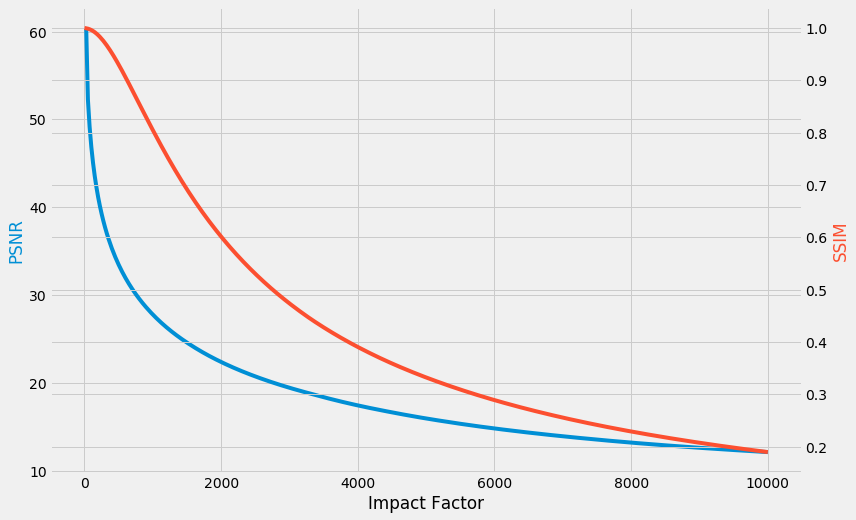

In [13]:
# Colors: https://github.com/matplotlib/matplotlib/blob/38be7aeaaac3691560aeadafe46722dda427ef47/lib/matplotlib/mpl-data/stylelib/fivethirtyeight.mplstyle

plt.style.use('fivethirtyeight')

fig, ax1 = plt.subplots(figsize=(12,8))

ax1.set_xlabel('Impact Factor')
ax1.set_ylabel('PSNR', color = '#008fd5', zorder = 3)

# Creating a second Y-axis that shares the same X-axis
ax2 = ax1.twinx()  
ax2.set_ylabel('SSIM', color = '#fc4f30', zorder = 4)

ax1.grid(True)
ax2.grid(True)

ax1.plot(pandas_dataframe_final_PSNR_mean, color = '#008fd5')
ax2.plot(pandas_dataframe_final_SSIM_mean, color = '#fc4f30')